### 過去作業中我都以TESL為Data來源，因此我期末報告就以同為在美股汽車產業的福特(Ford)汽車做配對

<font size=4>**TESL**https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch</font>

<font size=4>**FORD**https://finance.yahoo.com/quote/FORD?p=FORD&.tsrc=fin-srch</font>

In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller 
from arch.unitroot import ADF
import stockstats
import yfinance as yf
import statsmodels.api as sm
import talib
import mpl_finance as mpf
import pandas as pd
import numpy as np
%matplotlib inline

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
TSLA = yf.download("TSLA", start="2016-06-18", end="2021-06-18",group_by="ticker")
FORD = yf.download("FORD", start="2016-06-18", end="2021-06-18",group_by="ticker")
TSLA1Year = yf.download("TSLA", start="2020-06-18", end="2021-06-18",group_by="ticker")
FORD1Year = yf.download("FORD", start="2020-06-18", end="2021-06-18",group_by="ticker")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-17,43.562000,43.998001,42.900002,43.094002,43.094002,15563000
2016-06-20,43.900002,44.750000,43.646000,43.939999,43.939999,17777500
2016-06-21,44.136002,44.514000,43.762001,43.922001,43.922001,22645000
2016-06-22,39.894001,41.189999,39.150002,39.332001,39.332001,118712000
2016-06-23,39.138000,39.509998,38.425999,39.279999,39.279999,50653500
...,...,...,...,...,...,...
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16165000
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000
2021-06-15,616.690002,616.789978,598.229980,599.359985,599.359985,17764100


In [4]:
FORD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-17,1.23,1.30,1.2200,1.22,1.22,48900
2016-06-20,1.22,1.28,1.2200,1.25,1.25,8800
2016-06-21,1.25,1.30,1.2200,1.24,1.24,59600
2016-06-22,1.30,1.30,1.2300,1.26,1.26,19700
2016-06-23,1.25,1.27,1.2300,1.24,1.24,10000
...,...,...,...,...,...,...
2021-06-11,2.84,2.98,2.8400,2.93,2.93,77200
2021-06-14,2.94,2.94,2.7100,2.82,2.82,200800
2021-06-15,2.79,2.84,2.7200,2.73,2.73,3561900


---

<font size=5>**TESL，蠟燭圖、10日均線、30日均線，五年的**</font>

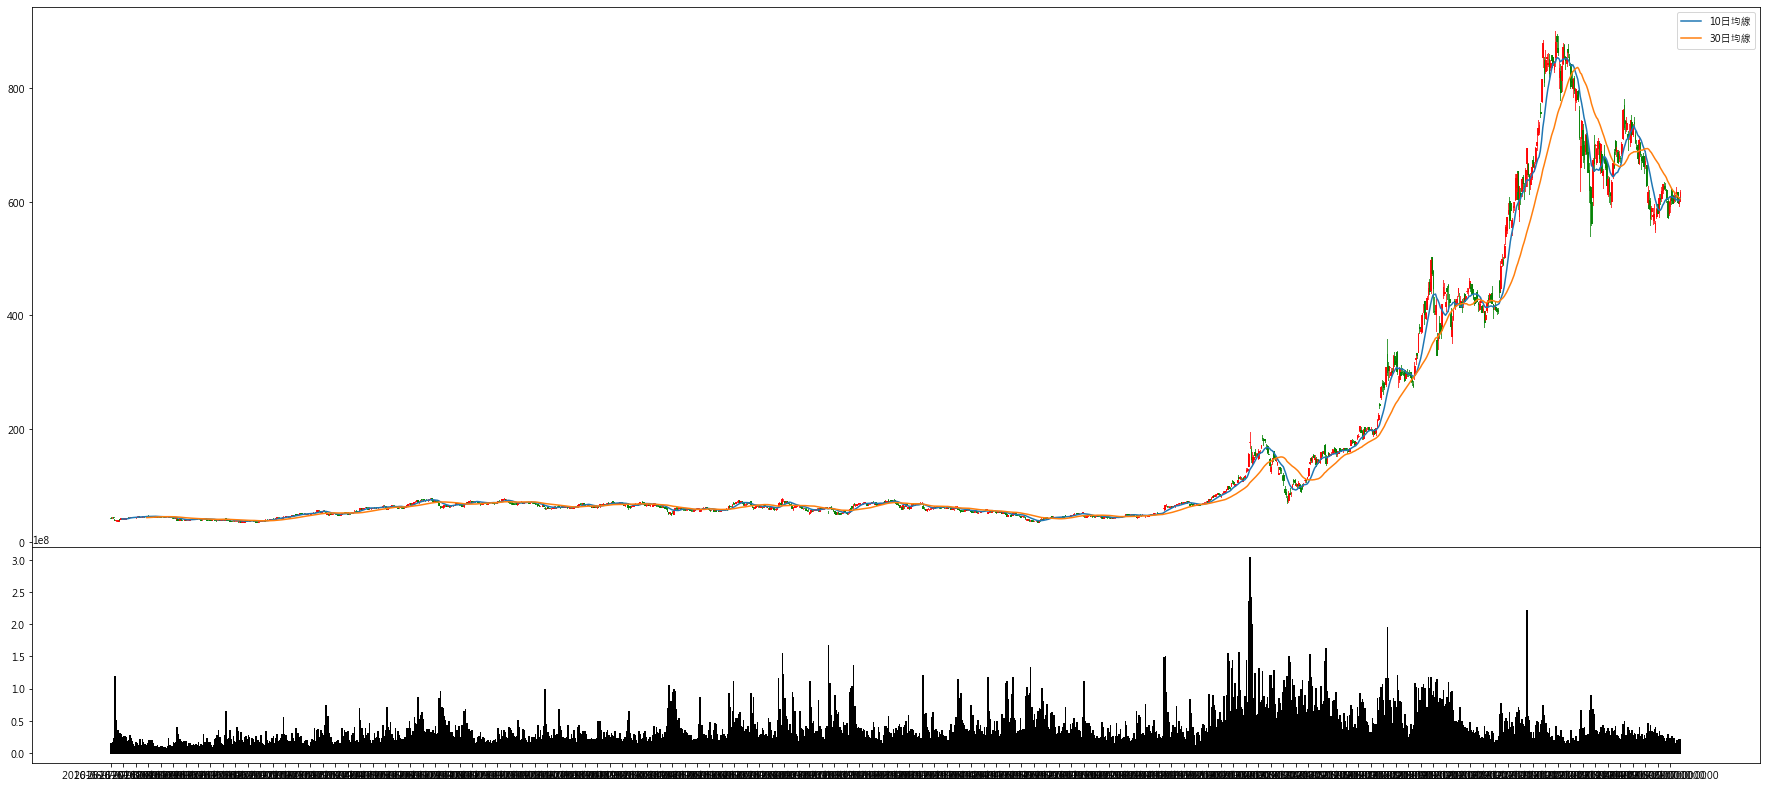

In [5]:
sma_10 = talib.SMA(np.array(TSLA['Close']), 10)
sma_30 = talib.SMA(np.array(TSLA['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(TSLA.index), 10))
ax.set_xticklabels(TSLA.index[::10])
mpf.candlestick2_ochl(ax, TSLA['Open'], TSLA['Close'], TSLA['High'],
                      TSLA['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, TSLA['Open'], TSLA['Close'], TSLA['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(TSLA.index), 10))
ax2.set_xticklabels(TSLA.index[::10])

ax.legend();

<font size=6>**TSLA 5年 MACD**</font>

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


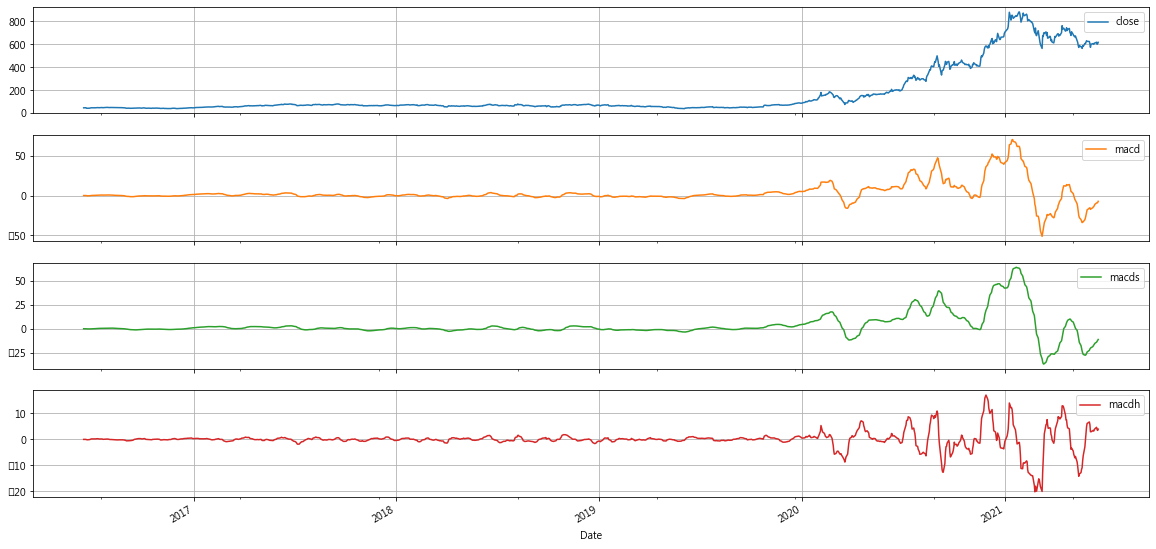

In [6]:
data = stockstats.StockDataFrame.retype(TSLA)
data[['close','macd','macds','macdh'] #
         ].plot(subplots=True,figsize=(20,10), grid=True)
plt.show()

<font size=6>**TSLA 30日RSI**</font>

In [7]:
Close=TSLA.close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()

,Close,closeChange,upPrc,downPrc
Date,,,,
2016-06-20,43.939999,0.845997,0.845997,0.000000
2016-06-21,43.922001,-0.017998,0.000000,0.017998
2016-06-22,39.332001,-4.590000,0.000000,4.590000
2016-06-23,39.279999,-0.052002,0.000000,0.052002
2016-06-24,38.630001,-0.649998,0.000000,0.649998


In [8]:
SMUP30=[]
SMDOWN30=[]
for i in range(30,len(upPrc)+1):
    SMUP30.append(np.mean(upPrc.values[(i-30):i],dtype=np.float32))
    SMDOWN30.append(np.mean(downPrc.values[(i-30):i],dtype=np.float32))

In [9]:
rsi30=[100*SMUP30[i]/(SMUP30[i]+SMDOWN30[i]) for i in range(len(SMUP30))]

In [10]:
indexRsi=indexprc[29:]
Rsi30=pd.Series(rsi30,index=indexRsi)
Rsi30.head()
Rsi30.describe()

count    1229.000000
mean       54.028418
std        12.884697
min        22.324624
25%        43.888926
50%        52.765227
75%        64.412623
max        88.537998
dtype: float64

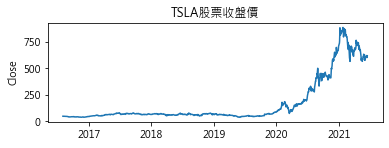

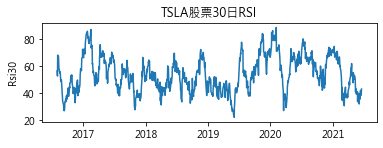

In [11]:
#收盤價和30日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi30.index])
plt.ylabel('Close')
plt.title('TSLA股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi30)
plt.ylabel('Rsi30')
plt.title('TSLA股票30日RSI')
plt.show()

<font size=5>**TESL，蠟燭圖、10日均線、30日均線，一年的**</font>

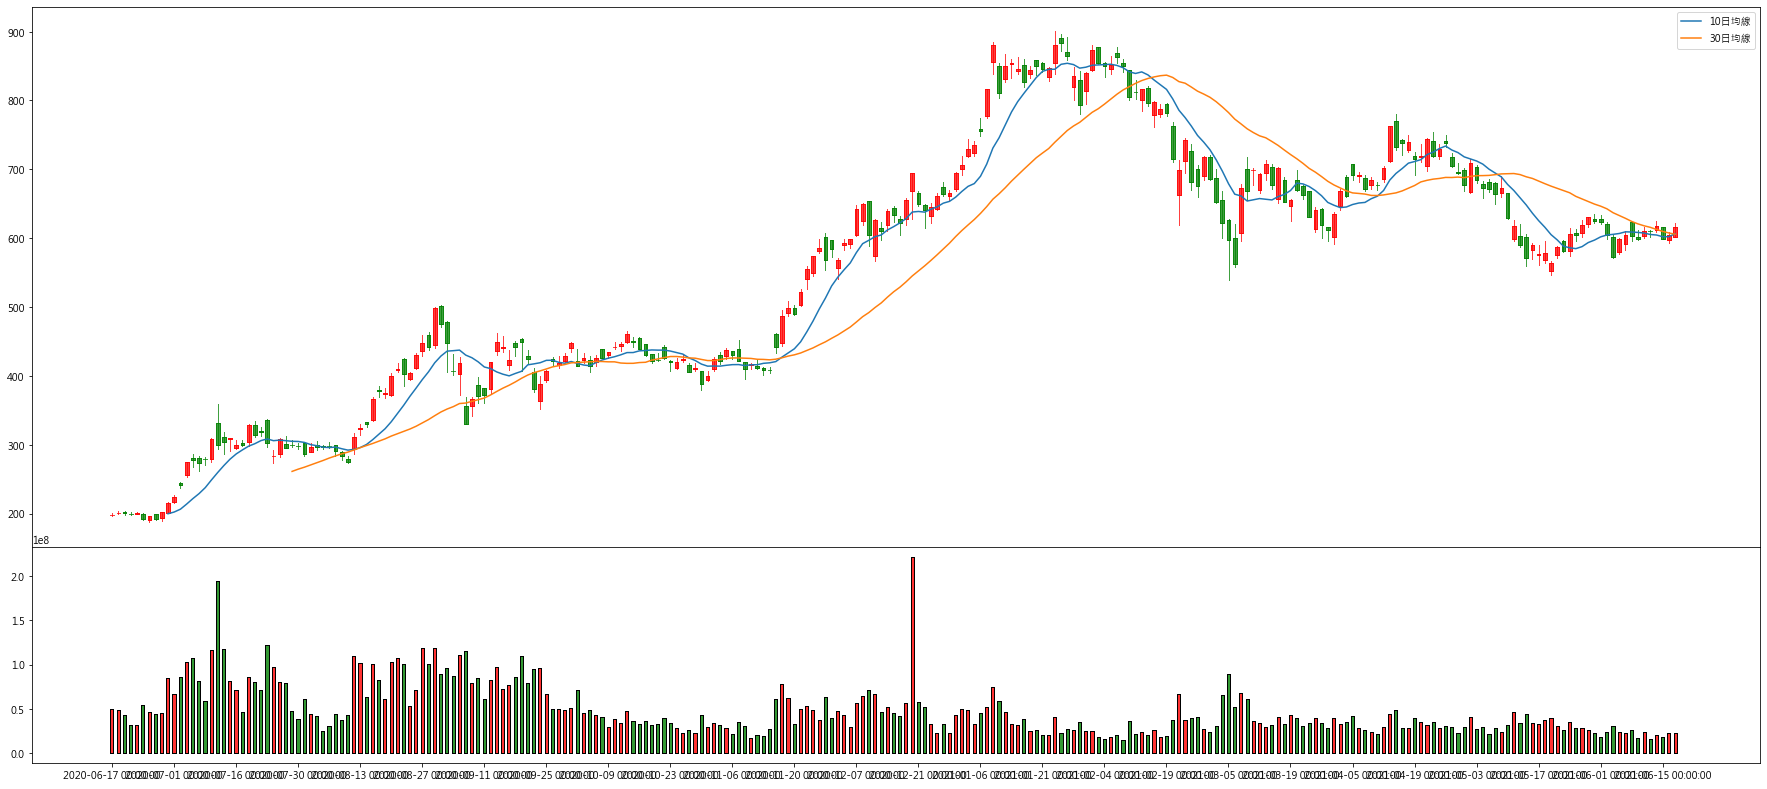

In [12]:
sma_10 = talib.SMA(np.array(TSLA1Year['Close']), 10)
sma_30 = talib.SMA(np.array(TSLA1Year['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(TSLA1Year.index), 10))
ax.set_xticklabels(TSLA1Year.index[::10])
mpf.candlestick2_ochl(ax, TSLA1Year['Open'], TSLA1Year['Close'], TSLA1Year['High'],
                      TSLA1Year['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, TSLA1Year['Open'], TSLA1Year['Close'], TSLA1Year['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(TSLA1Year.index), 10))
ax2.set_xticklabels(TSLA1Year.index[::10])

ax.legend();

<font size=6>**TSLA 1年 MACD**</font>

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


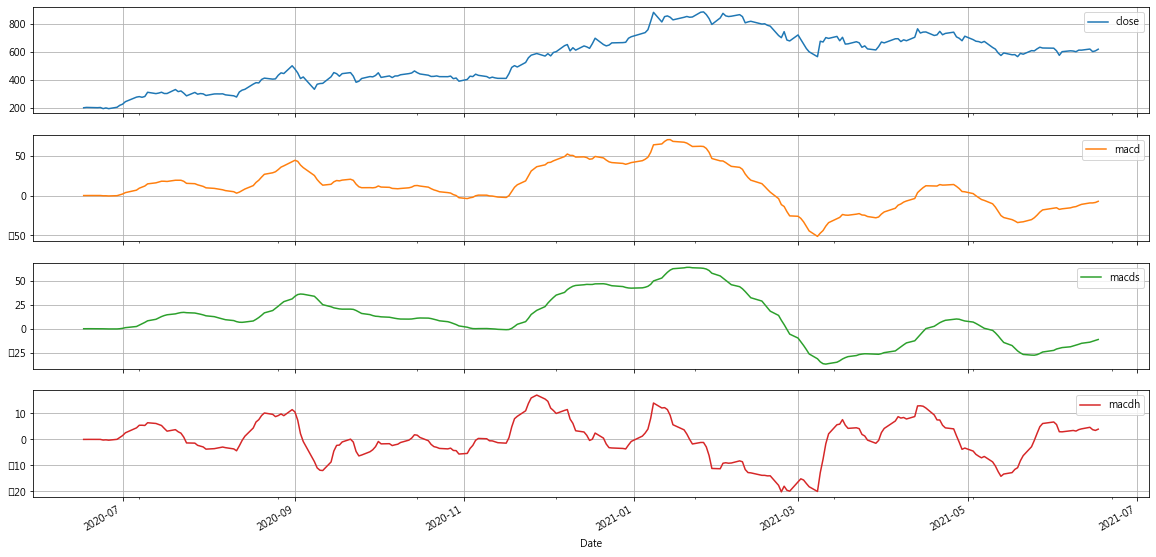

In [13]:
data = stockstats.StockDataFrame.retype(TSLA1Year)
data[['close','macd','macds','macdh'] #
         ].plot(subplots=True,figsize=(20,10), grid=True)
plt.show()

<font size=6>**TSLA 6日RSI**</font>

In [14]:
SMUP6=[]
SMDOWN6=[]
for i in range(6,len(upPrc)+1):
    SMUP6.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN6.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [15]:
rsi6=[100*SMUP6[i]/(SMUP6[i]+SMDOWN6[i]) for i in range(len(SMUP6))]

In [16]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    1253.000000
mean       54.568893
std        25.501507
min         0.000000
25%        34.549293
50%        55.010652
75%        75.430510
max       100.000000
dtype: float64

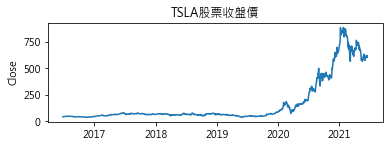

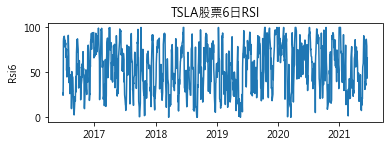

In [17]:
#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('TSLA股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('TSLA股票6日RSI')
plt.show()

<font size=6>**TSLA MA**</font>

In [18]:
TSLA['MA40']=TSLA['close'].rolling(40).mean()
TSLA['MA200']=TSLA['close'].rolling(200).mean()

<AxesSubplot:xlabel='Date'>

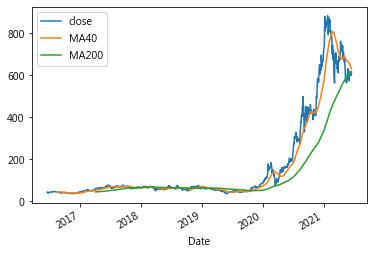

In [19]:
TSLA['close'].plot(legend=True)
TSLA['MA40'].plot(legend=True)
TSLA['MA200'].plot(legend=True)

---

<font size=5>**FORD，蠟燭圖、10日均線、30日均線，五年的**</font>

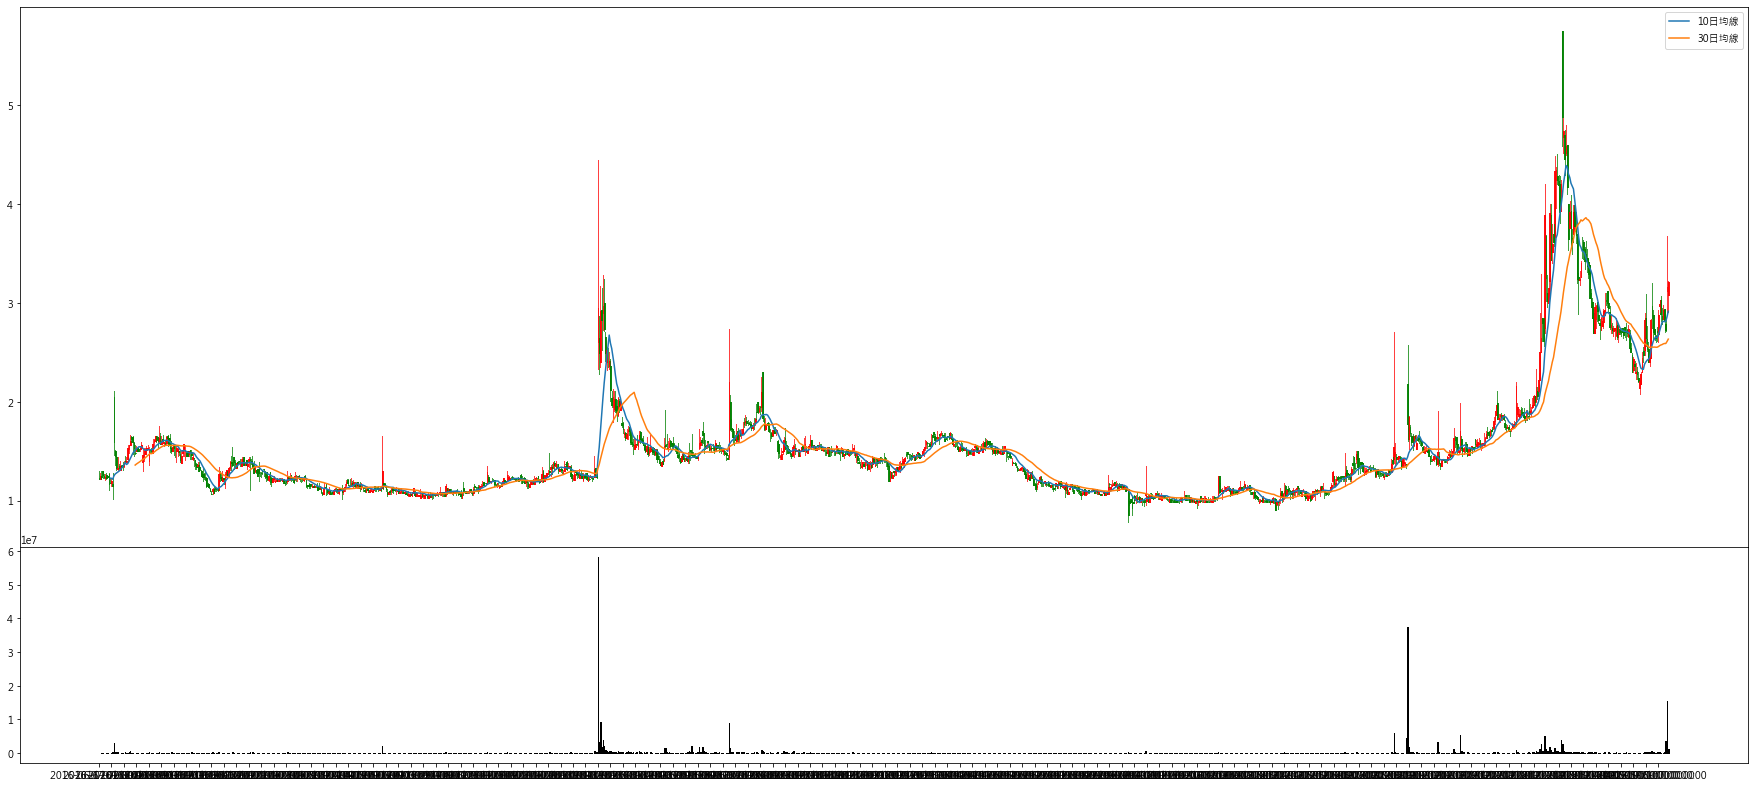

In [20]:
sma_10 = talib.SMA(np.array(FORD['Close']), 10)
sma_30 = talib.SMA(np.array(FORD['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(FORD.index), 10))
ax.set_xticklabels(FORD.index[::10])
mpf.candlestick2_ochl(ax, FORD['Open'], FORD['Close'], FORD['High'],
                      FORD['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, FORD['Open'], FORD['Close'], FORD['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(FORD.index), 10))
ax2.set_xticklabels(FORD.index[::10])

ax.legend();

<font size=6>**Ford 5年 MACD**</font>

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


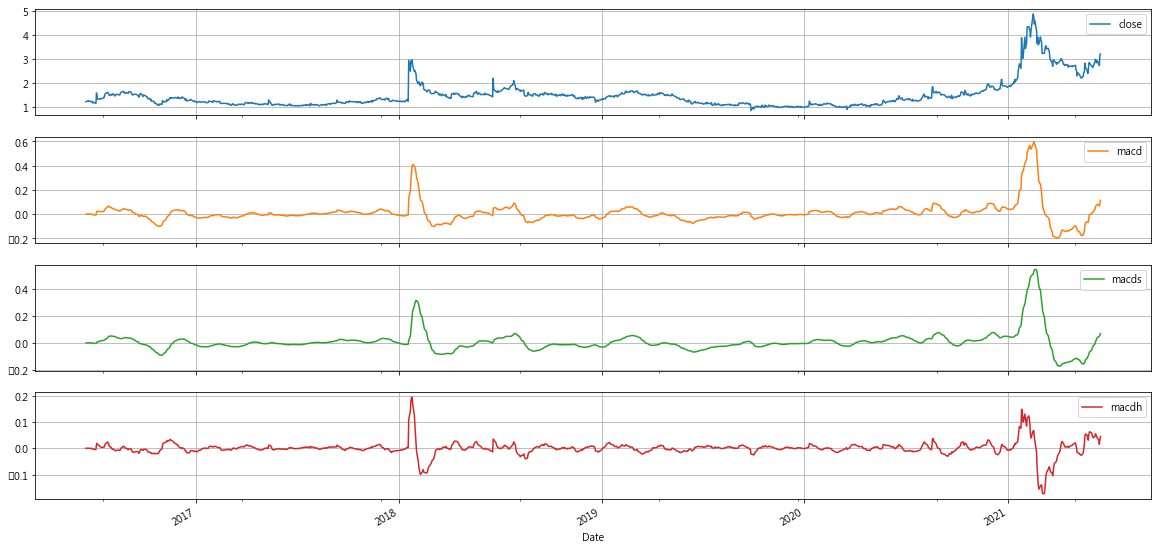

In [21]:
data = stockstats.StockDataFrame.retype(FORD)
data[['close','macd','macds','macdh'] #
         ].plot(subplots=True,figsize=(20,10), grid=True)
plt.show()

<font size=6>**Ford 30日RSI**</font>

In [22]:
Close=FORD.close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()

,Close,closeChange,upPrc,downPrc
Date,,,,
2016-06-20,1.25,0.03,0.03,0.00
2016-06-21,1.24,-0.01,0.00,0.01
2016-06-22,1.26,0.02,0.02,0.00
2016-06-23,1.24,-0.02,0.00,0.02
2016-06-24,1.24,0.00,0.00,0.00


In [23]:
SMUP30=[]
SMDOWN30=[]
for i in range(30,len(upPrc)+1):
    SMUP30.append(np.mean(upPrc.values[(i-30):i],dtype=np.float32))
    SMDOWN30.append(np.mean(downPrc.values[(i-30):i],dtype=np.float32))

In [24]:
rsi30=[100*SMUP30[i]/(SMUP30[i]+SMDOWN30[i]) for i in range(len(SMUP30))]

In [25]:
indexRsi=indexprc[29:]
Rsi30=pd.Series(rsi30,index=indexRsi)
Rsi30.head()
Rsi30.describe()

count    1229.000000
mean       49.627215
std         9.045933
min        20.524015
25%        44.303790
50%        50.000000
75%        55.421687
max        82.470124
dtype: float64

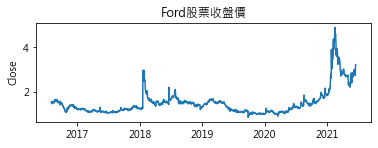

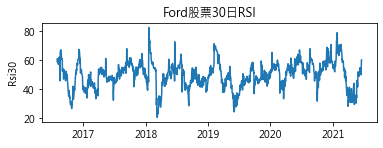

In [26]:
#收盤價和30日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi30.index])
plt.ylabel('Close')
plt.title('Ford股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi30)
plt.ylabel('Rsi30')
plt.title('Ford股票30日RSI')
plt.show()

<font size=5>**FORD，蠟燭圖、10日均線、30日均線，五年的**</font>

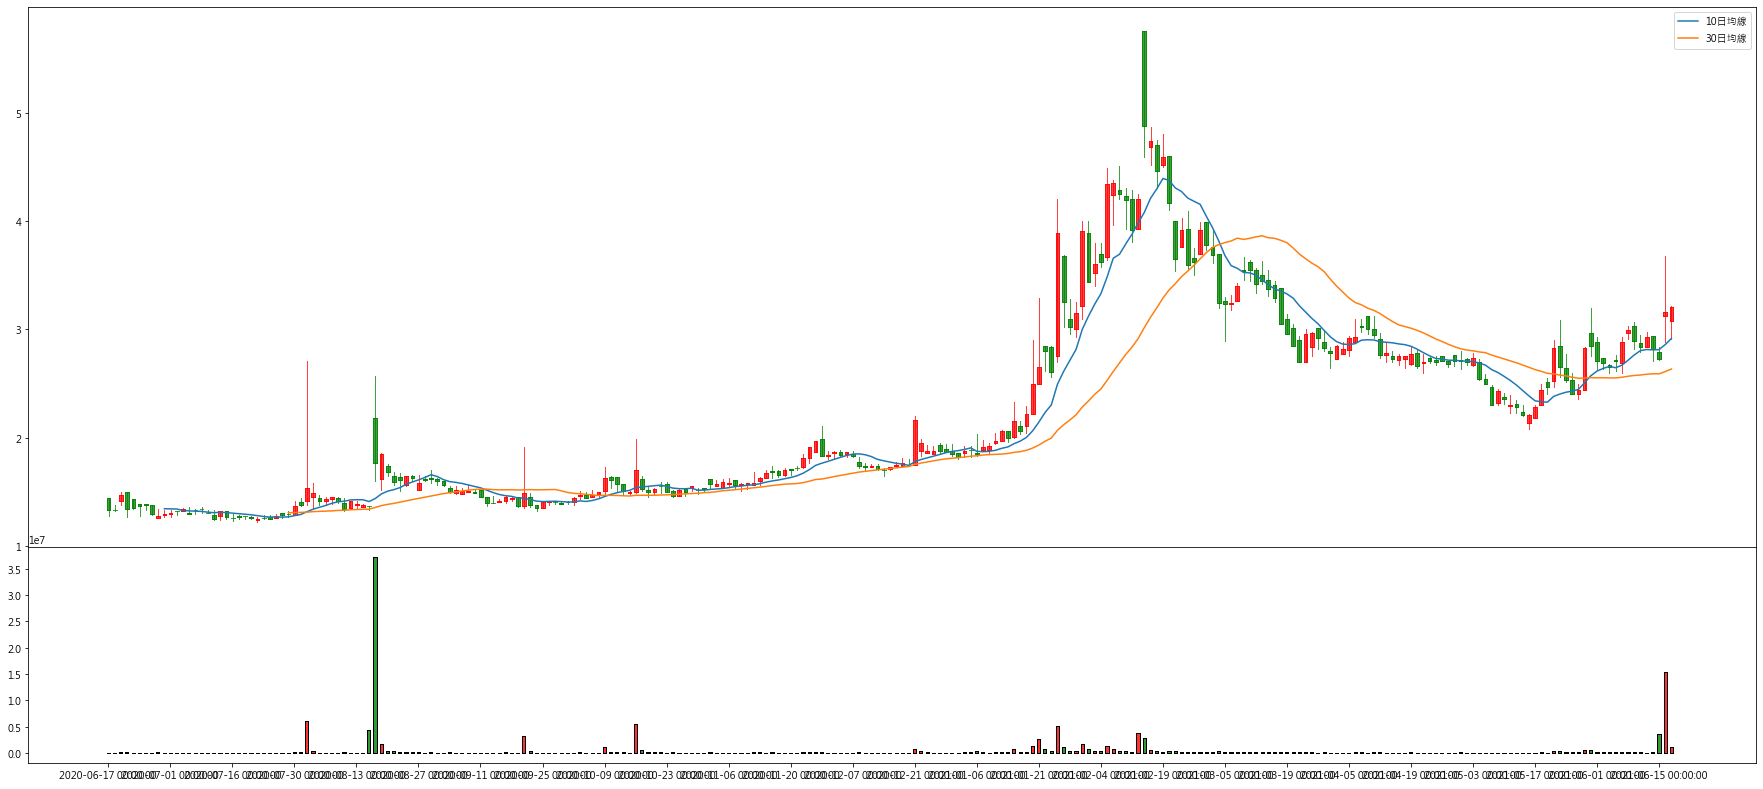

In [27]:
sma_10 = talib.SMA(np.array(FORD1Year['Close']), 10)
sma_30 = talib.SMA(np.array(FORD1Year['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(FORD1Year.index), 10))
ax.set_xticklabels(FORD1Year.index[::10])
mpf.candlestick2_ochl(ax, FORD1Year['Open'], FORD1Year['Close'], FORD1Year['High'],
                      FORD1Year['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, FORD1Year['Open'], FORD1Year['Close'], FORD1Year['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(FORD1Year.index), 10))
ax2.set_xticklabels(FORD1Year.index[::10])

ax.legend();

<font size=6>**Ford 1年 MACD**</font>

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


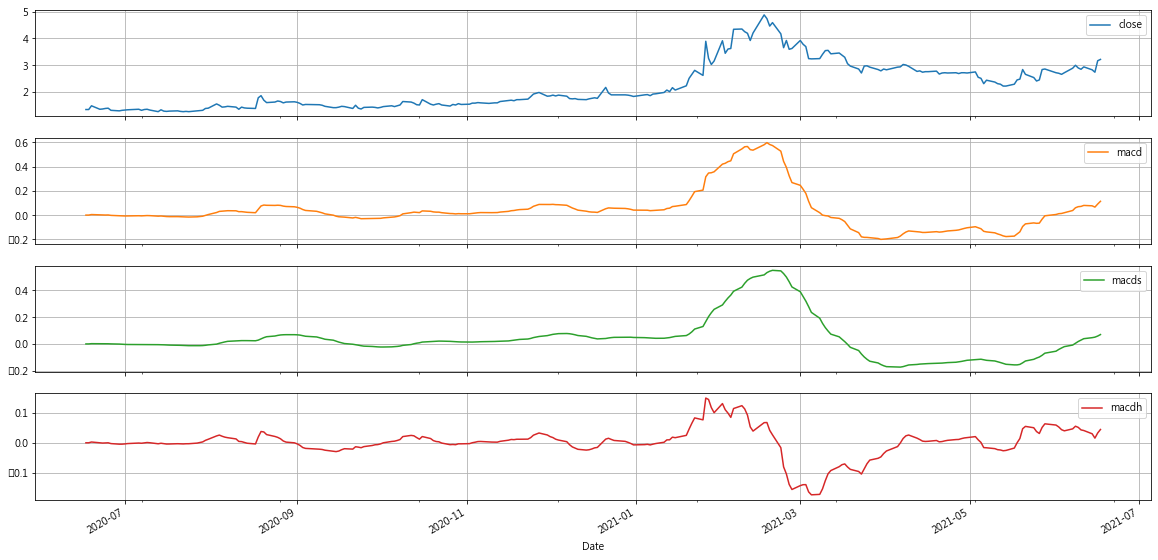

In [28]:
data = stockstats.StockDataFrame.retype(FORD1Year)
data[['close','macd','macds','macdh'] #
         ].plot(subplots=True,figsize=(20,10), grid=True)
plt.show()

<font size=6>**Ford 6日RSI**</font>

In [29]:
SMUP6=[]
SMDOWN6=[]
for i in range(6,len(upPrc)+1):
    SMUP6.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN6.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [30]:
rsi6=[100*SMUP6[i]/(SMUP6[i]+SMDOWN6[i]) for i in range(len(SMUP6))]

In [31]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    1253.000000
mean       48.795287
std        21.186239
min         0.000000
25%        33.333357
50%        50.000000
75%        63.157900
max       100.000000
dtype: float64

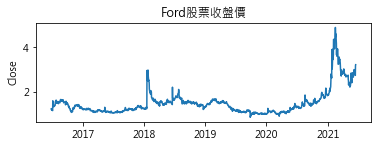

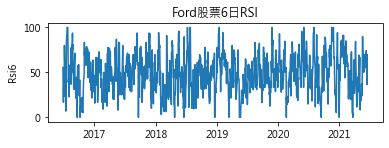

In [32]:
#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('Ford股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('Ford股票6日RSI')
plt.show()

<font size=6>**Ford MA**</font>

In [33]:
FORD['MA40']=FORD['close'].rolling(40).mean()
FORD['MA200']=FORD['close'].rolling(200).mean()

<AxesSubplot:xlabel='Date'>

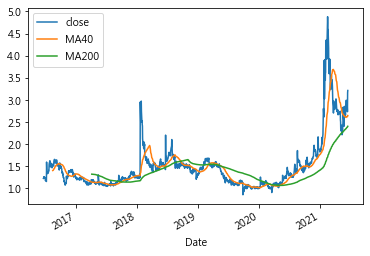

In [34]:
FORD['close'].plot(legend=True)
FORD['MA40'].plot(legend=True)
FORD['MA200'].plot(legend=True)

---

## 使用OLS模型技術分析

In [35]:
monthly_prices = pd.concat([TSLA['close'], FORD['close']], axis=1)
monthly_prices.columns = ['TSLA', 'FORD']

print(monthly_prices.head())

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0) 
print(clean_monthly_returns.head())

                 TSLA  FORD
Date                       
2016-06-17  43.094002  1.22
2016-06-20  43.939999  1.25
2016-06-21  43.922001  1.24
2016-06-22  39.332001  1.26
2016-06-23  39.279999  1.24
                TSLA      FORD
Date                          
2016-06-20  0.019631  0.024590
2016-06-21 -0.000410 -0.008000
2016-06-22 -0.104503  0.016129
2016-06-23 -0.001322 -0.015873
2016-06-24 -0.016548  0.000000


In [36]:
X = clean_monthly_returns['TSLA']
y = clean_monthly_returns['FORD']

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   FORD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.882
Date:                Fri, 18 Jun 2021   Prob (F-statistic):            0.00881
Time:                        19:43:06   Log-Likelihood:                 1759.2
No. Observations:                1258   AIC:                            -3514.
Df Residuals:                    1256   BIC:                            -3504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.002      1.071      0.2

---

<font size=4>**TESL**</font>

<font size=4>**#Ho：非平穩的**</font>

<font size=4>**#H1：靜止平穩的**</font>

In [37]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

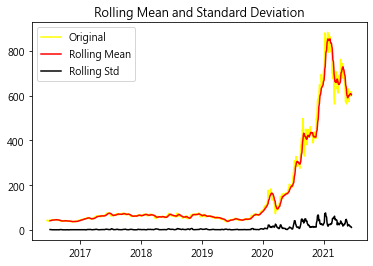

Results of dickey fuller test
Test Statistics                  -0.024177
p-value                           0.956486
No. of lags used                 21.000000
Number of observations used    1237.000000
critical value (1%)              -3.435647
critical value (5%)              -2.863879
critical value (10%)             -2.568015
dtype: float64


In [38]:
test_stationarity(TSLA['close'])

<font size=4>**均值和標準差的增加，所以說呢是不平穩ㄉ。P值大於 0.05，不能拒絕Null假設=接受Ho**</font>

---

<font size=4>**FORD**</font>

<font size=4>**#Ho：非平穩的**</font>

<font size=4>**#H1：靜止平穩的**</font>

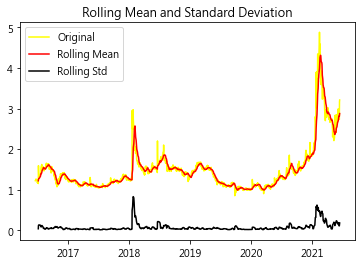

Results of dickey fuller test
Test Statistics                  -1.523280
p-value                           0.521965
No. of lags used                 22.000000
Number of observations used    1236.000000
critical value (1%)              -3.435652
critical value (5%)              -2.863881
critical value (10%)             -2.568016
dtype: float64


In [39]:
test_stationarity(FORD['close'])

<font size=4>**均值和標準差的增加，所以說呢是不平穩ㄉ。P值剛好也大於 0.05，不能拒絕Null假設=接受Ho**</font>

---

<font size=6>**TSLA time series model**</font>

In [40]:
from pmdarima.arima import auto_arima
import numpy as np

In [41]:
df_log = np.log(TSLA.close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [42]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4237.099, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4235.133, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4235.123, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4234.110, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4233.613, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.500 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1130
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2120.549
Date:                Fri, 18 Jun 2021   AIC                          -4237.099
Time:                        19:44:00   BIC                          -4227.041
Sample:                             0   HQIC                         -4233.299
                               - 1130                                  

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


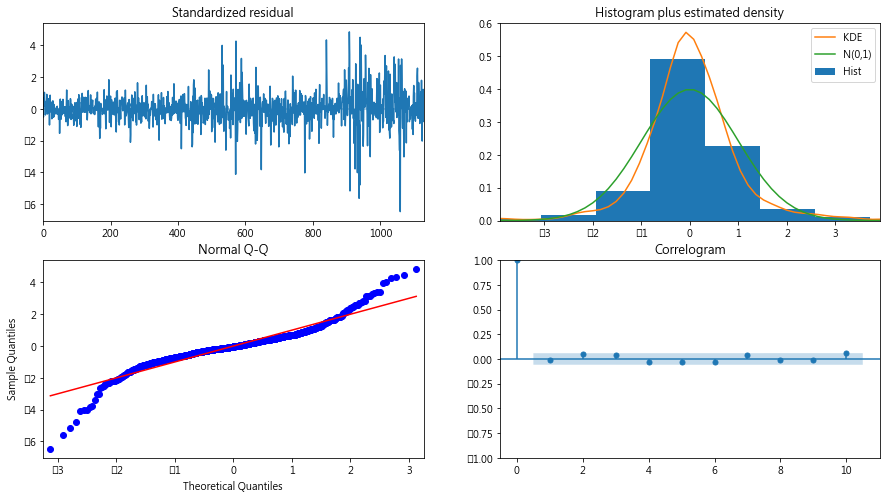

In [43]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

<font size=6>**FORD time series model**</font>

In [44]:
df_log = np.log(FORD.close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [45]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3708.919, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3790.743, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3793.655, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3710.878, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3792.471, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3792.636, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3789.680, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3795.571, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3794.355, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3794.557, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3792.673, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3791.594, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.637 seconds
                               SARIMAX Results                              

---

<font size=6>**配對交易 TSLA & FORD**</font>

In [46]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller


import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [47]:
TSLA['ROI']=(TSLA['close'].shift(-1)-TSLA['close'])/TSLA['close']*100
TSLA = TSLA.dropna()
TSLA

,open,high,low,close,adj close,volume,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,MA40,MA200,ROI
Date,,,,,,,,,,,,,,,
2017-04-03,57.380001,59.799999,56.916000,59.703999,59.703999,69443000,54.520855,52.938409,1.582447,0.850994,0.850994,0.731452,52.472550,44.37696,1.735232
2017-04-04,59.377998,60.962002,58.905998,60.740002,60.740002,50673000,55.477647,53.516305,1.961342,1.073064,1.073064,0.888278,52.702200,44.46519,-2.864672
2017-04-05,60.408001,60.976002,58.840000,59.000000,59.000000,39404500,56.019548,53.922504,2.097043,1.277860,1.277860,0.819183,52.889800,44.54049,1.254240
2017-04-06,59.375999,60.388000,58.820000,59.740002,59.740002,27603000,56.591925,54.353430,2.238495,1.469987,1.469987,0.768508,53.072900,44.61958,1.285567
2017-04-07,59.500000,60.537998,59.430000,60.507999,60.507999,22898000,57.194398,54.809324,2.385074,1.653004,1.653004,0.732070,53.239600,44.72546,3.255770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600,605.025130,617.399591,-12.374461,-16.156802,-16.156802,3.782341,644.570753,608.36116,-0.037694
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16165000,605.773574,616.843326,-11.069752,-15.139392,-15.139392,4.069640,641.346754,609.38727,1.278917
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000,607.606871,616.906043,-9.299172,-13.971348,-13.971348,4.672176,638.294504,610.32255,-2.967511


In [48]:
FORD['ROI']=(FORD['close'].shift(-1)-FORD['close'])/FORD['close']*100
FORD = FORD.dropna()
FORD

,open,high,low,close,adj close,volume,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,MA40,MA200,ROI
Date,,,,,,,,,,,,,,,
2017-04-03,1.21,1.22,1.18,1.18,1.18,47600,1.132933,1.131010,0.001923,-0.010677,-0.010677,0.012600,1.13825,1.31600,-1.694914
2017-04-04,1.16,1.22,1.16,1.16,1.16,32700,1.137097,1.133157,0.003940,-0.007754,-0.007754,0.011694,1.13625,1.31570,-0.862068
2017-04-05,1.15,1.22,1.15,1.15,1.15,22000,1.139082,1.134405,0.004677,-0.005268,-0.005268,0.009945,1.13450,1.31520,2.608693
2017-04-06,1.16,1.23,1.15,1.18,1.18,10300,1.145377,1.137782,0.007595,-0.002695,-0.002695,0.010290,1.13325,1.31490,-1.694914
2017-04-07,1.18,1.20,1.15,1.16,1.16,6900,1.147627,1.139428,0.008199,-0.000516,-0.000516,0.008715,1.13175,1.31440,2.586215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,2.87,2.95,2.79,2.84,2.84,91600,2.761307,2.689686,0.071621,0.028748,0.028748,0.042874,2.61250,2.36580,3.169020
2021-06-11,2.84,2.98,2.84,2.93,2.93,77200,2.787260,2.707487,0.079773,0.038953,0.038953,0.040820,2.61700,2.37220,-3.754271
2021-06-14,2.94,2.94,2.71,2.82,2.82,200800,2.792297,2.715821,0.076476,0.046457,0.046457,0.030018,2.61875,2.37815,-3.191486


In [49]:
TSLA = yf.download("TSLA", start="2016-06-18", end="2021-06-18",group_by="ticker")
FORD = yf.download("FORD", start="2016-06-18", end="2021-06-18",group_by="ticker")
TSLA = TSLA.dropna()
FORD = FORD.dropna()
ratios = TSLA['Close'] / FORD['Close']
print(len(ratios) * .80 ) 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1007.2


In [50]:
#全部共有 1259 80/20分
train = ratios[:1007]
test = ratios[1007:]

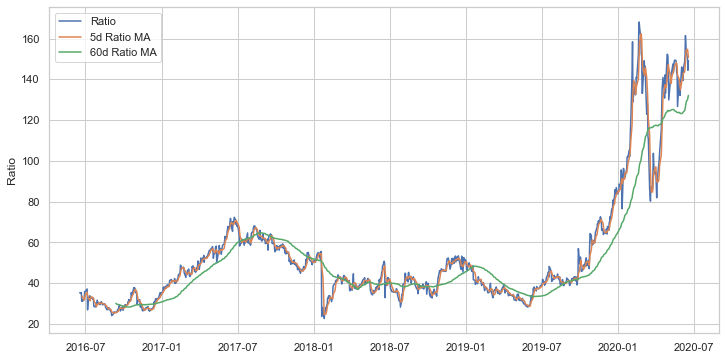

In [51]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

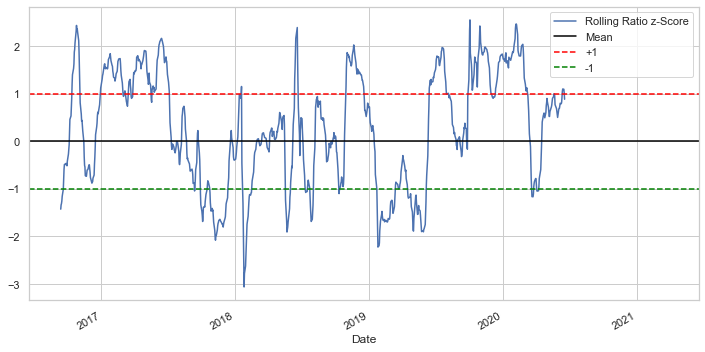

In [52]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2016-06-18', '2021-06-18')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

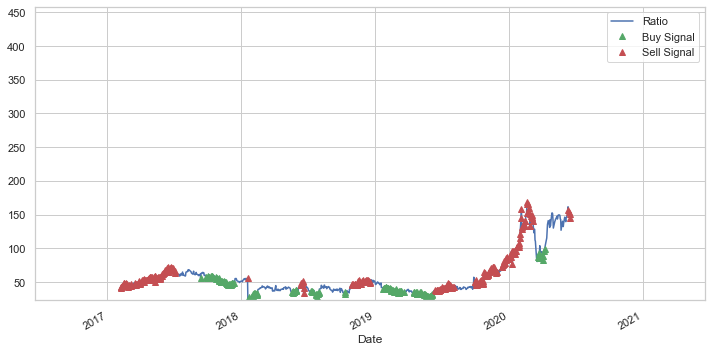

In [53]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim('2016-06-18','2021-06-18')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [54]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [55]:
print("獲利金額：",trade(TSLA['Close'].iloc[1007:], FORD['Close'].iloc[1007:], 60, 5))

獲利金額： 14467.624406982563
